<a href="https://colab.research.google.com/github/avinashjamdade436/DS_ML_Insurance_Price_Prediction_Regression_analysis/blob/main/AVI_DS_ML_PROJECT_01_(7_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Health Insurance Price for an individual or family**

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Table of Contents**
* Effect of this proposal 
* Data Understanding and Variable Description
* Data Cleaning
* Data Visualization
* Machine learning approach


# **1. Effect of this proposal**

**Brief Introduction**
1. In this project, my main aim is to show ways to go deep into the data story-telling. Also, I will work on a models that could give us an approximation as to what will be the health_insurance_price. 
2. Nevertheless, we must go deeply into what factors influenced the health_insurance_price. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us. 
3. Lastly, we will go step by step to understand the story behind the patients in this dataset only through this way we could have a better understanding of what features will help our model have a closer accuracy to the true health_insurance_price.

4. IRL this model can predict health_insurance_price for an insurance company based on given variables. So that the company can decide how much they charge people correctly.


In [ ]:
data = pd.read_excel('/content/Health_insurance_cost.xlsx')
data.head(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Hypothesis Testing**
 1. Test the hypothesis that There are no null values

In [ ]:
print(data.isnull().sum())
columns_with_missing = data.columns[data.isnull().any()].tolist()
print(columns_with_missing)

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64
['age', 'BMI', 'health_insurance_price']


There are null values and we will treat them using Imputation technique

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100
missing_percentage

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

# **2. Variable/Features information:**

 1.  **age**: *28 null values*, float to int,  continious

 2.   **gender** : categorical, gender, female, male

 3.   **BMI** : *23 null values*,  continious,  Body mass index

 4.   **Children** : numerical,  discrete, Number of children covered by health insurance

 5.   **smoking_status** : no null,  categorical

 6.   **location** : no null,  categorical

 7.   **health_insurance_price** : *2 null values*,   continious, Individual medical costs billed by health insurance

**Checking for duplicate**

**Hypothesis Testing**
2. Test the hypothesis that There are no duplicate rows or entries in dataset.

In [ ]:
data[data.duplicated(keep='first')]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(keep ='first', inplace = True)

# **3. Visualization**

**1. Distribution Visualization:**

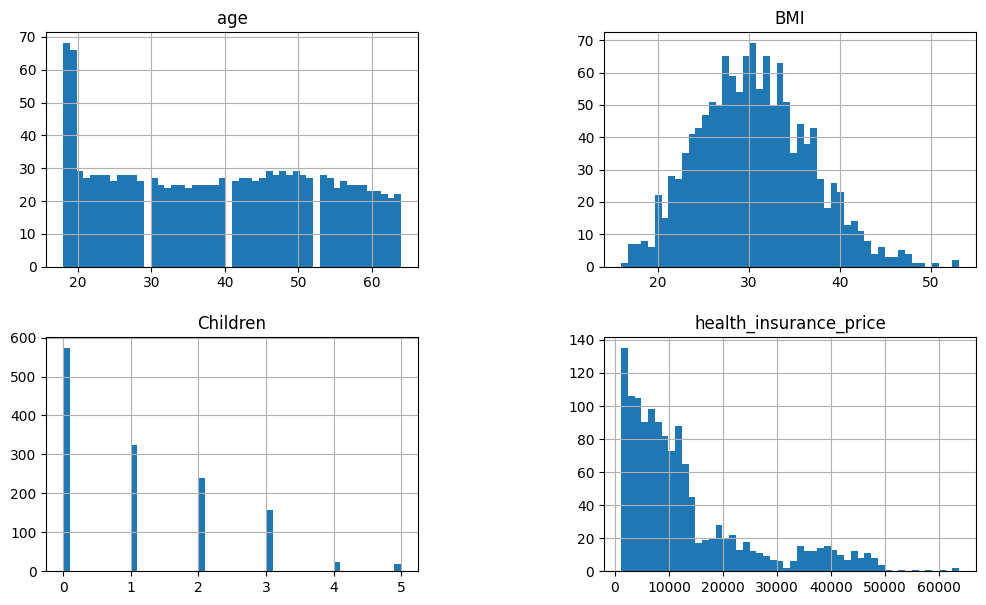

In [ ]:
data.hist(bins=50,figsize=(12,7)) ##Histogram is used to see the distribution of a numerical value
plt.subplots_adjust(hspace=0.3, wspace=0.5)

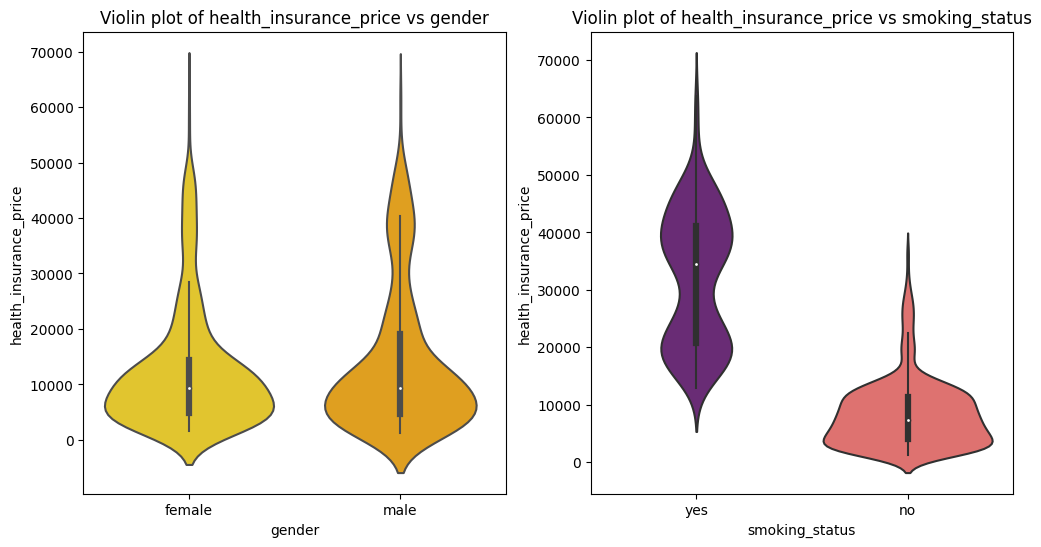

In [ ]:
# violin plot for gender and smoker in one fig
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(121)
sns.violinplot(x='gender', y='health_insurance_price',data=data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of health_insurance_price vs gender')

ax = f.add_subplot(122)
sns.violinplot(x='smoking_status', y='health_insurance_price',data=data,palette='magma',ax=ax)
ax.set_title('Violin plot of health_insurance_price vs smoking_status');

**Conclusion:**
1. From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000.
2. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000. For smoker the minimum insurance charge is itself 5000.

**Hypothesis Testing**

3.Test the hypothesis that Dependent variable has normal distribution.

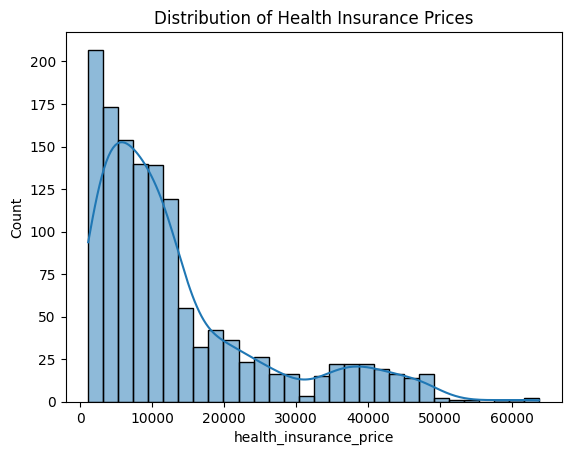

In [ ]:
#  Visualize the distribution of health insurance prices, (Target variable)
sns.histplot(data['health_insurance_price'], kde=True)
plt.title('Distribution of Health Insurance Prices')
plt.show()

The Data distribution for health_insurance_price is Right skewed and there is possibility for outliers.


# **check for outliers:**

#### Let's define a function to find out the lower and the upper whisker using SDM:

In [ ]:
def out_std(data, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = data[column].mean(), data[column].std()
    # calculate the cutoff value : in normal distribution all values out of 3*std are outliers.
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_std(data,'health_insurance_price')

The lower bound value is -23062.211547778934
The upper bound value is 49616.688656556464
Total number of outliers are 7


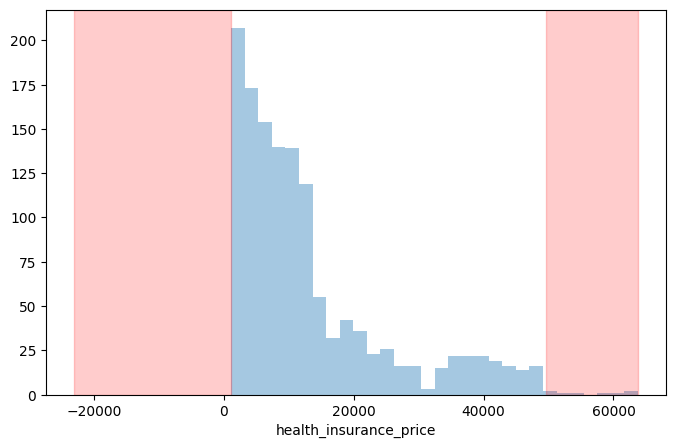

In [ ]:
plt.figure(figsize = (8,5))
sns.distplot(data.health_insurance_price, kde=False)
plt.axvspan(xmin = lower,xmax= data.health_insurance_price.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= data.health_insurance_price.max(),alpha=0.2, color='red')

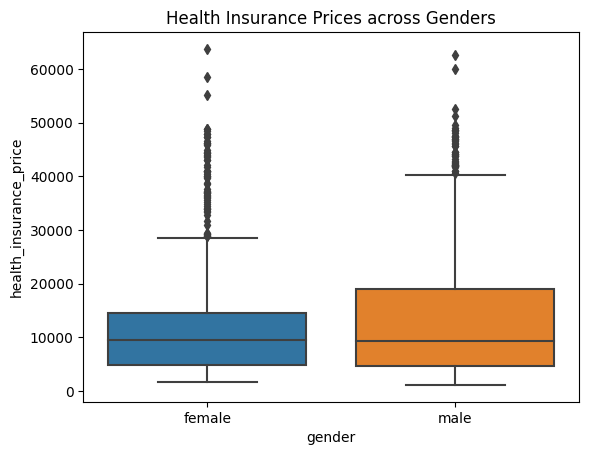

In [ ]:
# Analyze health insurance prices across different genders
sns.boxplot(x='gender', y='health_insurance_price', data=data)
plt.title('Health Insurance Prices across Genders')
plt.show()

Conclusion:
1. For females the outliers are more comparetively to males but the upper limit of female is around 30,000 whereas upper limit of male is around 40,000.
2. For both genders median value is same.

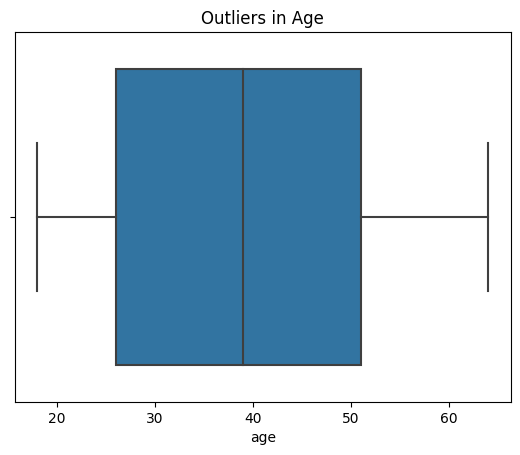

In [ ]:
# Identify outliers in age
sns.boxplot(x='age', data=data)
plt.title('Outliers in Age')
plt.show()

**2. Trends and Patterns:**

<Axes: title={'center': 'location vs health_insurance_price'}, xlabel='location', ylabel='health_insurance_price'>

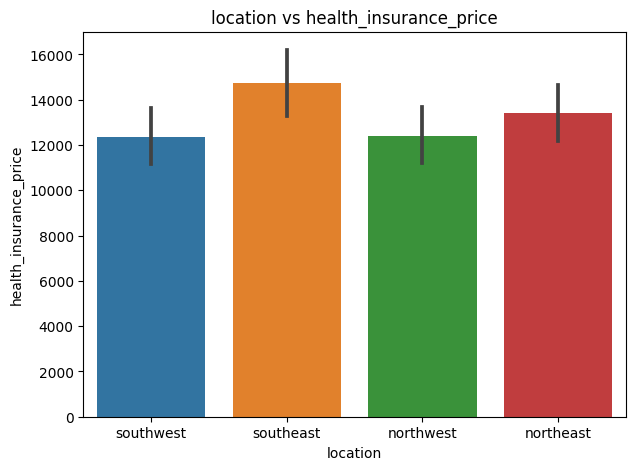

In [ ]:
# Analyze health insurance prices across different location
plt.figure(figsize=(7,5))
plt.title('location vs health_insurance_price')
sns.barplot(x='location',y='health_insurance_price',data=data)

<Axes: title={'center': 'smoking_status vs health_insurance_price'}, xlabel='smoking_status', ylabel='health_insurance_price'>

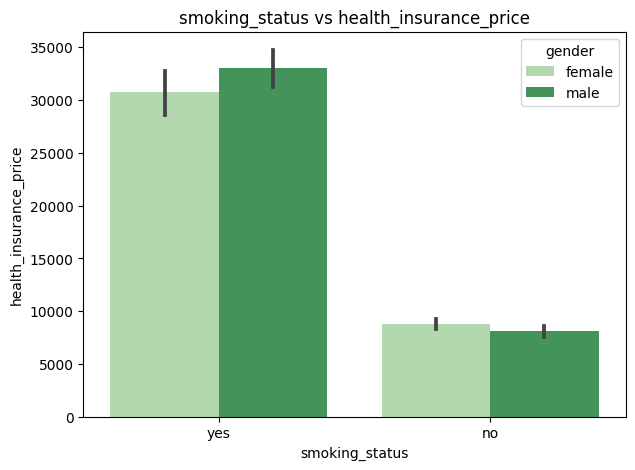

In [ ]:
# Analyze health insurance prices across different smoking_status
plt.figure(figsize=(7,5))
plt.title('smoking_status vs health_insurance_price')
sns.barplot(x='smoking_status',y='health_insurance_price',data=data,palette='Greens',hue='gender')

Conclusion:
1. For both the genders who smoke are having nearly same insurance value but  more compared to non smokers.

**3. Relationship Visualization:**

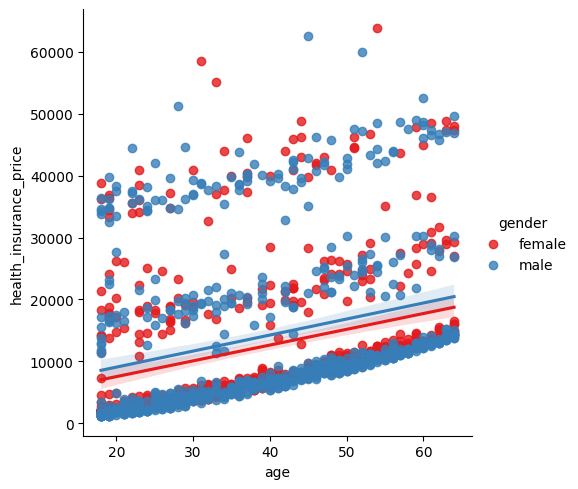

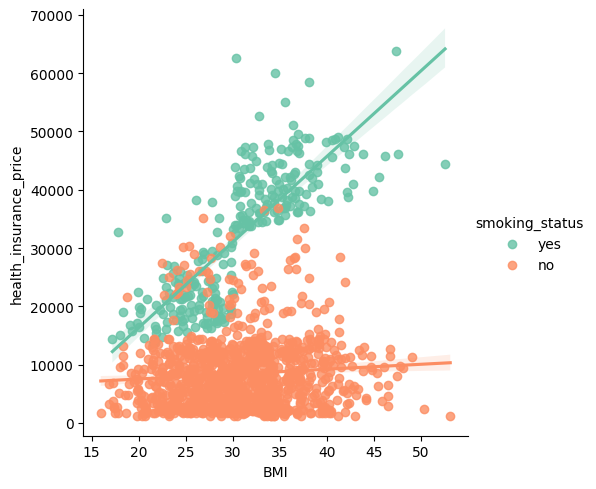

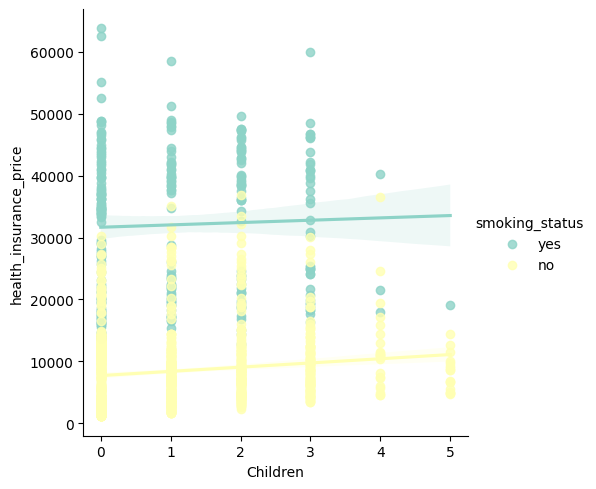

In [ ]:
# Relationship between age, BMI, Children with health_insurance_price with regression plot.
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=data, hue='gender', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set3')

Text(0.5, 1.0, 'BMI VS health_insurance_price')

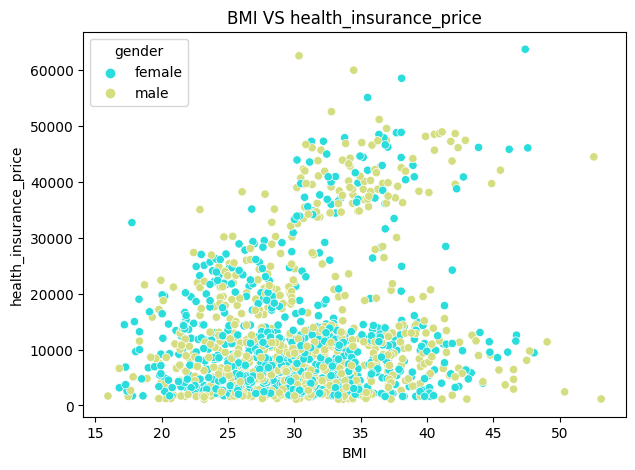

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='BMI',y='health_insurance_price',hue='gender',data=data,palette='rainbow')
plt.title('BMI VS health_insurance_price')

Text(0.5, 1.0, 'Correlation map')

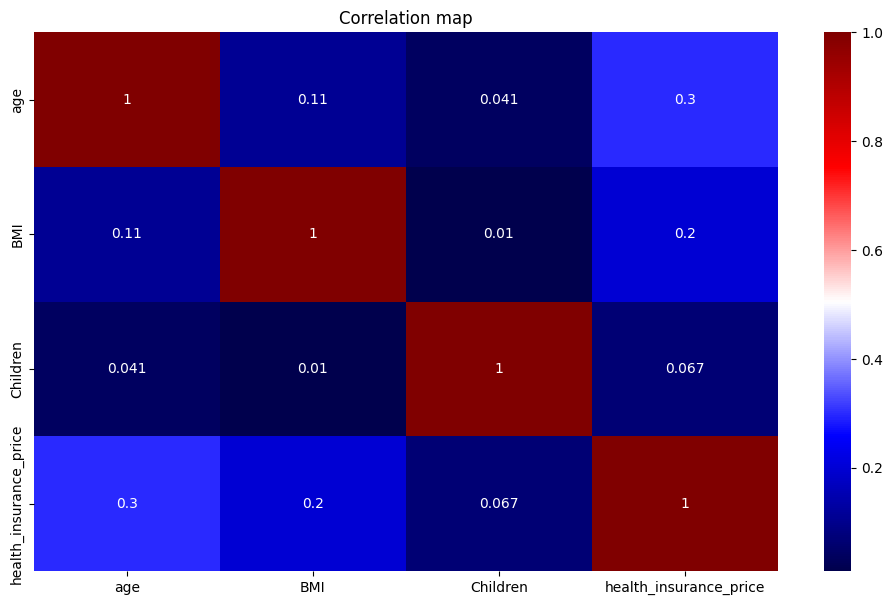

In [ ]:
#Finding the correlation
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='seismic')
plt.title("Correlation map")

**Conclusion:**

1. The heatmap shows us there is a **positive correlation between age and health_insurance_price**. As the age increases health_insurance_price also increase or vice versa.

2. We can also see that there is a **weak positive correlation between BMI and health_insurance_price.**

### Plotting Skew and Kurtosis

In [ ]:
print('Printing Skewness and Kurtosis for all columns')
for col in list(data.columns):
  if col in columns_with_missing:
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data[col].skew(),data[col].kurt()))

Printing Skewness and Kurtosis for all columns
age : Skewness 0.056 and  Kurtosis -1.245
BMI : Skewness 0.299 and  Kurtosis -0.049
health_insurance_price : Skewness 1.517 and  Kurtosis 1.607


1. -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate. If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
2.A distribution that is less peaked and has thinner tails than normal distribution has kurtosis value between 1 and 3. Such distribution is called platykurtic or platykurtotic.

# **4. Data Cleaning:**

In this part of the EDA. We will check ;
* Encoding
* Missing Values


The purpose of data cleaning is to get our data ready to analyze and visualize.

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['location'] = le.fit_transform(data['location'])


### **IMPUTATION**

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


#### MEAN

In [ ]:
from sklearn.impute import SimpleImputer # importing simple imputer

In [ ]:
data.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [ ]:
ins_mean = data.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
ins_mean.iloc[:, :] = mean_imputer.fit_transform(ins_mean) #  both fit a model to the data and then transform the data using that model

In [ ]:
ins_mean.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,30.638253,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,1.0,3866.85520


#### MEDIAN

In [ ]:
ins_median = data.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
ins_median.iloc[:, :] = median_imputer.fit_transform(ins_median)

In [ ]:
ins_median.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,30.305,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520


#### MODE

In [ ]:
ins_mode = data.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
ins_mode.iloc[:, :] = mode_imputer.fit_transform(ins_mode)

In [ ]:
ins_mode.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,32.300,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520


#### CONSTANT

In [ ]:
ins_constant = data.copy(deep=True) # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0) # using constant to impute the value
ins_constant.iloc[:, :] = constant_imputer.fit_transform(ins_constant)

In [ ]:
ins_constant.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,0.000,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520


### KNN

In [ ]:
!pip install fancyimpute

In [ ]:
from fancyimpute import KNN # importing KNN library

In [ ]:
knn_imputer = KNN() # calling KNN function
ins_knn = data.copy(deep=True) # creating copy
ins_knn.iloc[:, :] = knn_imputer.fit_transform(ins_knn)

Imputing row 1/1337 with 1 missing, elapsed time: 0.388
Imputing row 101/1337 with 0 missing, elapsed time: 0.391
Imputing row 201/1337 with 0 missing, elapsed time: 0.392
Imputing row 301/1337 with 0 missing, elapsed time: 0.394
Imputing row 401/1337 with 0 missing, elapsed time: 0.395
Imputing row 501/1337 with 0 missing, elapsed time: 0.396
Imputing row 601/1337 with 0 missing, elapsed time: 0.397
Imputing row 701/1337 with 0 missing, elapsed time: 0.398
Imputing row 801/1337 with 0 missing, elapsed time: 0.399
Imputing row 901/1337 with 0 missing, elapsed time: 0.399
Imputing row 1001/1337 with 0 missing, elapsed time: 0.399
Imputing row 1101/1337 with 0 missing, elapsed time: 0.400
Imputing row 1201/1337 with 0 missing, elapsed time: 0.403
Imputing row 1301/1337 with 0 missing, elapsed time: 0.405


In [ ]:
ins_knn.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,38.820635,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,1.0,3866.85520


In [ ]:
ins_knn.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

#### MICE

In [ ]:
from fancyimpute import IterativeImputer # importing iterative imputers

In [ ]:
MICE_imputer = IterativeImputer() # calling iterativeIMputer
ins_MICE = data.copy(deep=True) # creating a copy of penguin
ins_MICE.iloc[:, :] = MICE_imputer.fit_transform(ins_MICE)

In [ ]:
ins_MICE.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,28.233843,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,1.0,3866.85520


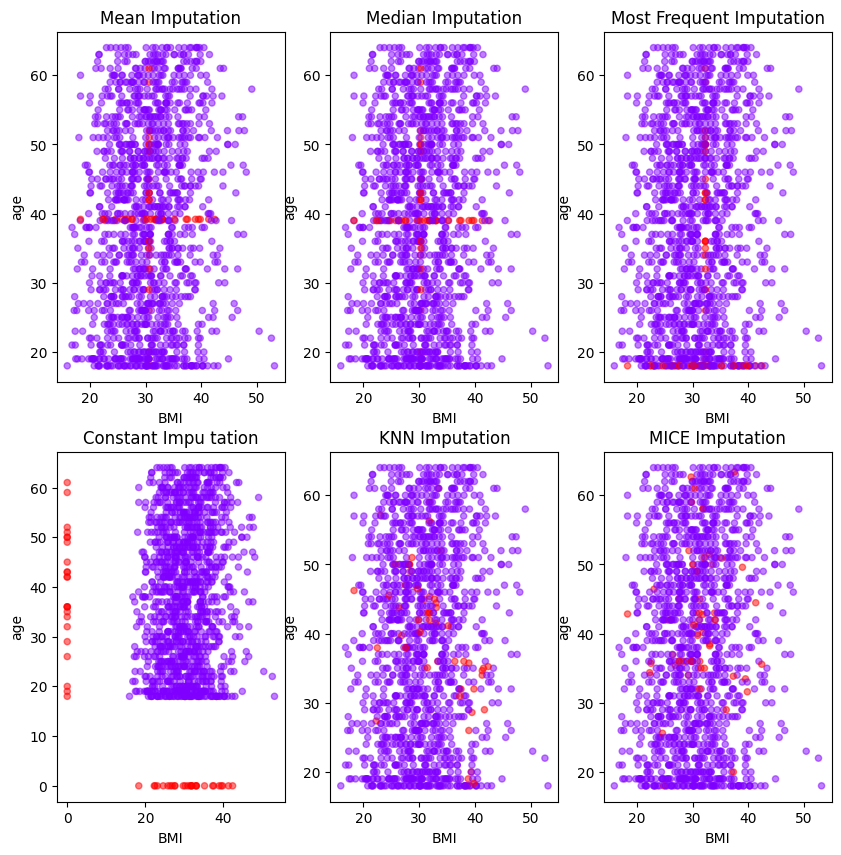

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = data['BMI'].isnull() + data['age'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': ins_mean, # creating a python dictionary
               'Median Imputation': ins_median,
               'Most Frequent Imputation': ins_mode,
               'Constant Impu tation': ins_constant,
               'KNN Imputation': ins_knn,
              'MICE Imputation': ins_MICE}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='BMI', y='age', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

As we can see with **MICE imputaion** is spread across the data.

In [ ]:
ins_MICE.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,28.233843,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,1.0,3866.85520


In [ ]:
ins_MICE.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
ins_MICE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   float64
 1   gender                  1337 non-null   float64
 2   BMI                     1337 non-null   float64
 3   Children                1337 non-null   float64
 4   smoking_status          1337 non-null   float64
 5   location                1337 non-null   float64
 6   health_insurance_price  1337 non-null   float64
dtypes: float64(7)
memory usage: 83.6 KB


In [ ]:
# Here we can change the which Imputed Data take to the model.
df_copy1 = ins_MICE.copy()

In [ ]:
# Changng the datatype of  to int for better understanding.
df_copy1['age'] = df_copy1['age'].astype(int)

In [ ]:
df_copy1.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

## **BINNING and ENCODING**

In [ ]:
# BINNING : Converting Numerical to categorical of (BMI) for age it is not standard and will affect model.
conditions = [
              (df_copy1['BMI'] <=18.5),
              (df_copy1['BMI'] >18.5)&(df_copy1['BMI'] <=24.9),
              (df_copy1['BMI'] >24.9)&(df_copy1['BMI'] <=29.9),
              (df_copy1['BMI'] >= 30)
             ]
values = ['underweight','normal','overweight','obese']

df_copy1['BMI']=np.select(conditions,values)

In [ ]:
df_copy1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,overweight,0.0,1.0,3.0,16884.92400
1,18,1.0,obese,1.0,0.0,2.0,1725.55230
2,28,1.0,obese,3.0,0.0,2.0,4449.46200
3,33,1.0,normal,0.0,0.0,1.0,21984.47061
4,32,1.0,overweight,0.0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,obese,3.0,0.0,1.0,10600.54830
1334,18,0.0,obese,0.0,0.0,0.0,2205.98080
1335,18,0.0,obese,0.0,0.0,2.0,1629.83350
1336,21,0.0,overweight,0.0,0.0,3.0,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
df_copy1['BMI'] = le.fit_transform(df_copy1['BMI'])
df_enc = df_copy1.copy()

In [ ]:
df_enc.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,3,0.0,1.0,3.0,16884.92400
1,18,1.0,2,1.0,0.0,2.0,1725.55230
2,28,1.0,2,3.0,0.0,2.0,4449.46200
3,33,1.0,1,0.0,0.0,1.0,21984.47061
4,32,1.0,3,0.0,0.0,1.0,3866.85520


## **Feature Scaling**

In [ ]:
from scipy import stats
# Handle outliers
# We can use the Z-score method to identify and remove outliers
z_scores = stats.zscore(df_enc['health_insurance_price'])
data_out = df_enc[(z_scores < 3)]  # Keep only data points within 3 standard deviations

In [ ]:
data_out

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,3,0.0,1.0,3.0,16884.92400
1,18,1.0,2,1.0,0.0,2.0,1725.55230
2,28,1.0,2,3.0,0.0,2.0,4449.46200
3,33,1.0,1,0.0,0.0,1.0,21984.47061
4,32,1.0,3,0.0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,2,3.0,0.0,1.0,10600.54830
1334,18,0.0,2,0.0,0.0,0.0,2205.98080
1335,18,0.0,2,0.0,0.0,2.0,1629.83350
1336,21,0.0,3,0.0,0.0,3.0,2007.94500


In [ ]:
# Perform feature engineering
# This step involves encoding categorical variables, scaling numerical variables, etc.
# Depending on the dataset, you may need to perform additional data transformations

In [ ]:
# Hypothesis Testing
# 4. Test the hypothesis that age has a significant impact on health insurance prices
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data_out['age'], data_out['health_insurance_price'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.30913545988378544
P-value: 7.615978181190512e-31


So our hypothesis is correct

# **model_building**

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBClassifier #Extreme Gradient Boost
import xgboost as xgb


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Split the dataset into training and testing sets
X = data_out.drop('health_insurance_price', axis=1)
y = data_out['health_insurance_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,age,gender,BMI,Children,smoking_status,location
0,19,0.0,3,0.0,1.0,3.0
1,18,1.0,2,1.0,0.0,2.0
2,28,1.0,2,3.0,0.0,2.0
3,33,1.0,1,0.0,0.0,1.0
4,32,1.0,3,0.0,0.0,1.0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler # performing standardized scaling technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 1.12530271,  0.98692754, -0.18241789, -0.89630247, -0.49146745,
        -0.48158782],
       [ 0.69476618,  0.98692754, -0.18241789, -0.89630247, -0.49146745,
         1.33546695],
       [-0.16630687,  0.98692754, -0.18241789, -0.06774832,  2.03472274,
        -1.39011521],
       ...,
       [-1.02737993, -1.01324561, -1.56879389, -0.06774832, -0.49146745,
         1.33546695],
       [ 0.04896139,  0.98692754,  1.2039581 ,  0.76080583, -0.49146745,
         1.33546695],
       [-0.88386775,  0.98692754, -0.18241789,  0.76080583, -0.49146745,
         1.33546695]])

In [ ]:
X_test=sc.fit_transform(X_test)  # try with sc.transform
X_test

array([[-1.47342968, -0.99250926, -0.20261722, -0.96929997, -0.53968707,
         0.48649775],
       [ 1.366145  ,  1.00754728, -0.20261722, -0.96929997, -0.53968707,
         0.48649775],
       [ 0.15932576, -0.99250926,  1.17933615, -0.1348864 , -0.53968707,
         1.37896949],
       ...,
       [-1.11848285,  1.00754728, -1.5845706 , -0.96929997, -0.53968707,
        -0.40597399],
       [-0.40858918, -0.99250926,  1.17933615, -0.1348864 , -0.53968707,
         0.48649775],
       [ 0.01734703, -0.99250926,  1.17933615,  0.69952716, -0.53968707,
        -0.40597399]])

In [ ]:
# Model selection and justification
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
cv_linear_reg = cross_val_score(estimator = linear_model, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_model.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_model.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))  
print('RMSE : {0:.3f}'.format(rmse_linear)) #.3f specifies that the value should be formatted as a floating-point number with three decimal places.

CV Linear Regression : 0.724
R2_score (train) : 0.737
R2_score (test) : 0.692
RMSE : 6579.737


In [ ]:
# Create an input data array for prediction
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

# Make the prediction
pred = linear_model.predict(input_data)[0]

print('Predicted price:', pred)

Predicted price: 103116.71807747034


In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict the response for the training dataset
y_pred_train = dt_model.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_train)

# Predict the response for the test dataset
y_pred_test = dt_model.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_test)

# Calculate the root mean squared error (RMSE)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Perform cross-validation
cv_dt = cross_val_score(estimator=dt_model, X=X, y=y, cv=10)

print('CV Decision Tree Regressor: {0:.3f}'.format(cv_dt.mean()))
print('R2_score (train): {0:.3f}'.format(r2_score_dt_train))
print('R2_score (test): {0:.3f}'.format(r2_score_dt_test))
print('RMSE: {0:.3f}'.format(rmse_dt))

CV Decision Tree Regressor: 0.704
R2_score (train): 0.985
R2_score (test): 0.727
RMSE: 6198.234


In [ ]:
# Create an input data array for prediction
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

# Make the prediction
pred = dt_model.predict(input_data)[0]

print('Predicted price:', pred)

Predicted price: 28868.6639


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict the response for the training dataset
y_pred_train = rf_model.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_train)

# Predict the response for the test dataset
y_pred_test = rf_model.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_test)

# Calculate the root mean squared error (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Perform cross-validation
cv_rf = cross_val_score(estimator=rf_model, X=X, y=y, cv=10) #performs cross-validation using cross_val_score to estimate the model's performance on unseen data.

print('CV Random Forest Regressor: {0:.3f}'.format(cv_rf.mean()))
print('R2_score (train): {0:.3f}'.format(r2_score_rf_train))
print('R2_score (test): {0:.3f}'.format(r2_score_rf_test))
print('RMSE: {0:.3f}'.format(rmse_rf))

CV Random Forest Regressor: 0.824
R2_score (train): 0.966
R2_score (test): 0.821
RMSE: 5017.779


In [ ]:
# pred=rf_model.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]
# pred
# Create an input data array for prediction
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

# Make the prediction
pred = rf_model.predict(input_data)[0]

print('Predicted price:', pred)

Predicted price: 28370.389773


In [ ]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Predict the response for the training dataset
y_pred_train = svr_model.predict(X_train)
r2_score_train = r2_score(y_train, y_pred_train)

# Predict the response for the test dataset
y_pred_test = svr_model.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Perform cross-validation
cv_svr = cross_val_score(estimator=svr_model, X=X, y=y, cv=10)

print('CV Support Vector Regressor: {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train): {0:.3f}'.format(r2_score_train))
print('R2_score (test): {0:.3f}'.format(r2_score_test))
print('RMSE: {0:.3f}'.format(rmse))

CV Support Vector Regressor: -0.102
R2_score (train): -0.092
R2_score (test): -0.126
RMSE: 12587.062


In [ ]:
# Create an input data array for prediction
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

# Make the prediction
pred = svr_model.predict(input_data)[0]

print('Predicted price:', pred)

Predicted price: 9291.755899519574


In [ ]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Predict the response for the training dataset
y_pred_train = xgb_model.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_train)

# Predict the response for the test dataset
y_pred_test = xgb_model.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_test)

# Calculate the root mean squared error (RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Perform cross-validation
cv_xgb = cross_val_score(estimator=xgb_model, X=X, y=y, cv=10)

print('CV XGBoost Regressor: {0:.3f}'.format(cv_xgb.mean()))
print('R2_score (train): {0:.3f}'.format(r2_score_xgb_train))
print('R2_score (test): {0:.3f}'.format(r2_score_xgb_test))
print('RMSE: {0:.3f}'.format(rmse_xgb))


CV XGBoost Regressor: 0.790
R2_score (train): 0.977
R2_score (test): 0.786
RMSE: 5486.334


In [ ]:
# Create an input data array for prediction
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

# Make the prediction
pred = xgb_model.predict(input_data)[0]

print('Predicted price:', pred)

Predicted price: 25465.39


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
cv_scores = [cv_linear_reg.mean(), cv_dt.mean(), cv_rf.mean(), cv_svr.mean(),cv_xgb.mean()]
r2_train_scores = [r2_score_linear_reg_train, r2_score_dt_train, r2_score_rf_train, r2_score_train,r2_score_xgb_train]
r2_test_scores = [r2_score_linear_reg_test, r2_score_dt_test, r2_score_rf_test, r2_score_test,r2_score_xgb_test]
rmse_scores = [rmse_linear, rmse_dt, rmse_rf, rmse,rmse_xgb]

# Model names
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor','XGBoost']

# Create a DataFrame for the scores
df_scores = pd.DataFrame({'Model': model_names,
                          'CV_R2_Score': cv_scores,
                          'Train_R2_Score': r2_train_scores,
                          'Test_R2_Score': r2_test_scores,
                          'RMSE': rmse_scores})

# Melt the DataFrame
df_scores_melted = df_scores.melt(id_vars='Model', var_name='Evaluation Metric', value_name='Score')

In [ ]:
df_scores

,Model,CV_R2_Score,Train_R2_Score,Test_R2_Score,RMSE
0,Linear Regression,0.724407,0.737302,0.692303,6579.737209
1,Decision Tree Regressor,0.704409,0.985340,0.726950,6198.234191
2,Random Forest Regressor,0.824388,0.966419,0.821051,5017.778554
3,Support Vector Regressor,-0.101751,-0.092359,-0.126042,12587.062303
4,XGBoost,0.790456,0.977112,0.786071,5486.334056


# Prediction on Test Data

In [ ]:
y_pred1 = linear_model.predict(X_test)
y_pred2 = dt_model.predict(X_test)
y_pred3 = rf_model.predict(X_test)
y_pred4 = svr_model.predict(X_test)
y_pred5 = xgb_model.predict(X_test)
df1 = pd.DataFrame({"Actual":y_test, "linear_model":y_pred1, "dt_model":y_pred2, "rf_model":y_pred3, "svr_model":y_pred4,"xgb_model":y_pred5})

In [ ]:
data_out.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,3,0.0,1.0,3.0,16884.92400
1,18,1.0,2,1.0,0.0,2.0,1725.55230
2,28,1.0,2,3.0,0.0,2.0,4449.46200
3,33,1.0,1,0.0,0.0,1.0,21984.47061
4,32,1.0,3,0.0,0.0,1.0,3866.85520


**Visualising Actual vs Predicted Values**

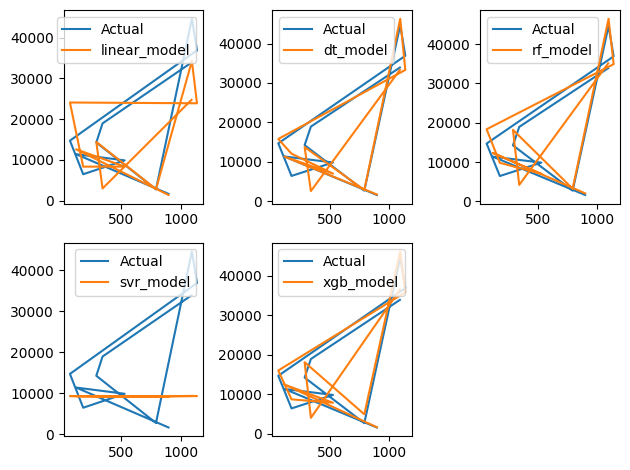

In [ ]:
plt.subplot(2,3,1)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["linear_model"].iloc[0:11], label="linear_model")
plt.legend()

plt.subplot(2,3,2)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["dt_model"].iloc[0:11], label="dt_model")
plt.legend()

plt.subplot(2,3,3)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["rf_model"].iloc[0:11], label="rf_model")
plt.legend()

plt.subplot(2,3,4)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["svr_model"].iloc[0:11], label="svr_model")
plt.legend(loc='upper right')

plt.subplot(2,3,5)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["xgb_model"].iloc[0:11], label="xgb_model")
plt.legend(loc='upper right')

plt.tight_layout()

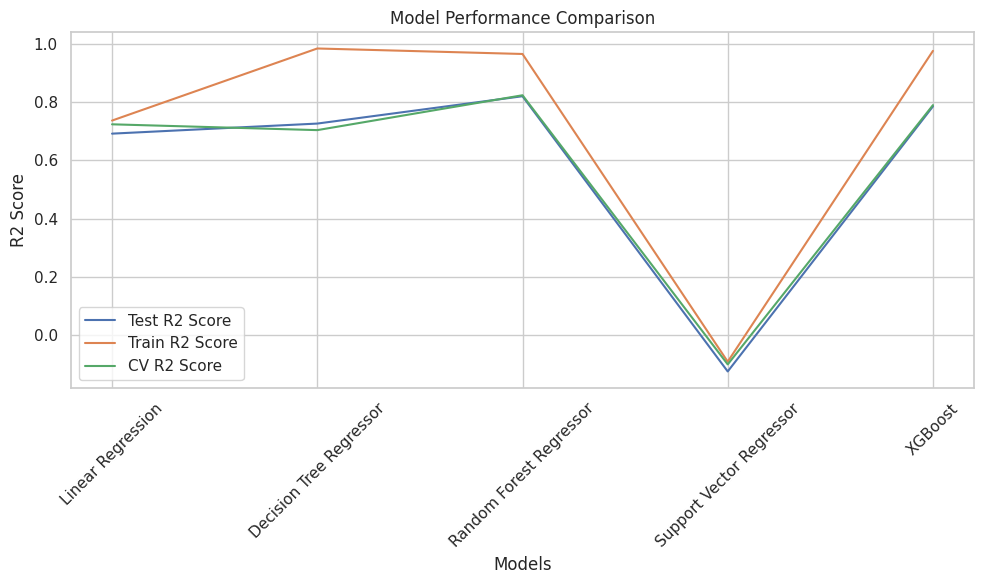

In [ ]:
# Set the style
sns.set(style='whitegrid')

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Test_R2_Score', data=df_scores, label='Test R2 Score')
sns.lineplot(x='Model', y='Train_R2_Score', data=df_scores, label='Train R2 Score')
sns.lineplot(x='Model', y='CV_R2_Score', data=df_scores, label='CV R2 Score')

# Set plot title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(loc='lower left')

# Display the plot
plt.tight_layout()
plt.show()


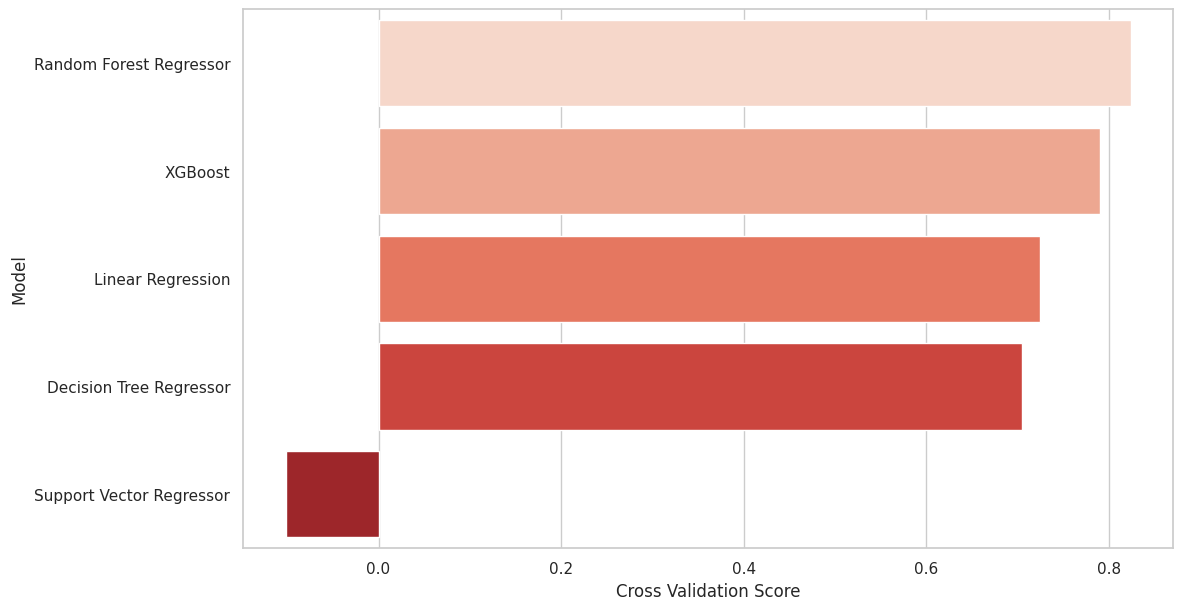

In [ ]:
plt.figure(figsize=(12,7))
df_scores.sort_values(by=['CV_R2_Score'], ascending=False, inplace=True)

sns.barplot(x='CV_R2_Score', y='Model',data = df_scores, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [ ]:
data_out.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

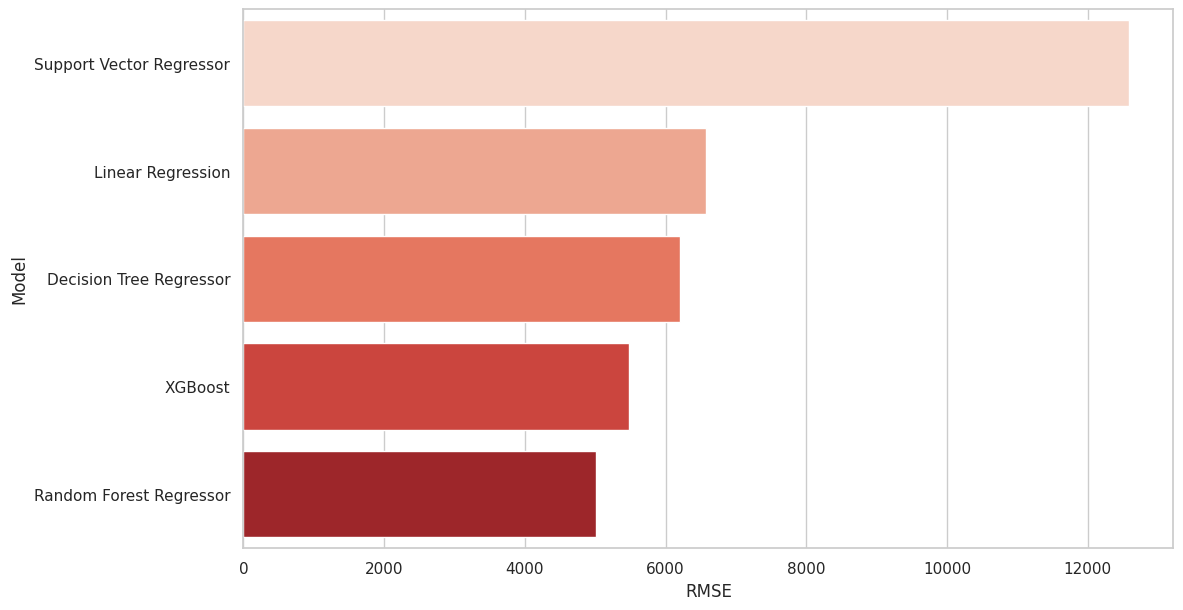

In [ ]:
plt.figure(figsize=(12,7))
df_scores.sort_values(by=['RMSE'], ascending=False, inplace=True)
sns.barplot(x='RMSE', y='Model',data = df_scores, palette='Reds')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

In [ ]:
##Predicting the health_insurance_price for rf_model
y_test_pred = rf_model.predict(X_test)
##Comparing the actual output values with the predicted values
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_rf

,Actual,Predicted
898,1634.57340,2039.622844
116,11381.32540,12335.059596
527,9861.02500,7017.806188
176,6455.86265,9808.249578
64,14711.74380,18356.380040
...,...,...
866,1141.44510,1268.491238
556,8334.58960,9104.452326
1027,21595.38229,2324.727105
585,4779.60230,5117.142934


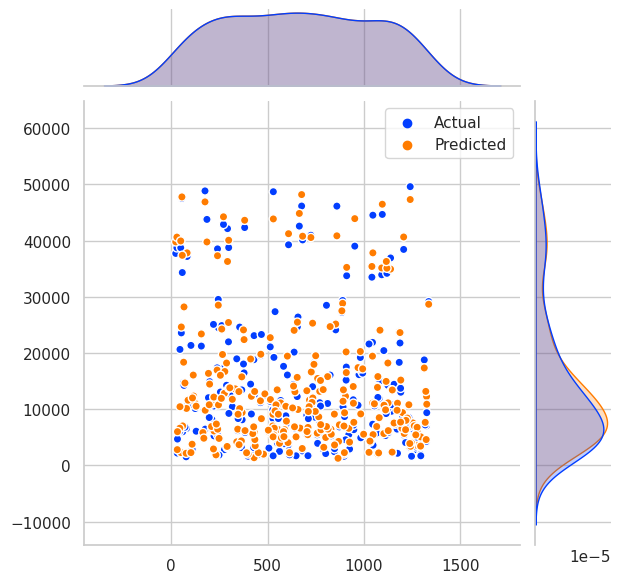

In [ ]:
# For Predicted and Actual data
sns.jointplot(data=df_rf, palette="bright", linewidth=1)
plt.legend()

In [ ]:
##Predicting the health_insurance_price for xgb_model
y_test_pred_xgb = xgb_model.predict(X_test)
##Comparing the actual output values with the predicted values
df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_xgb})
df_xgb

,Actual,Predicted
898,1634.57340,1696.738403
116,11381.32540,12492.375977
527,9861.02500,7885.450195
176,6455.86265,8747.617188
64,14711.74380,16045.911133
...,...,...
866,1141.44510,1719.274658
556,8334.58960,7542.261719
1027,21595.38229,2240.414795
585,4779.60230,4464.991699


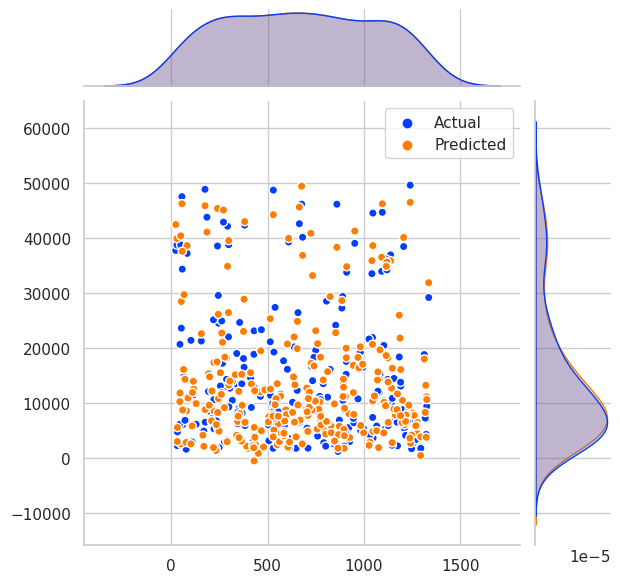

In [ ]:
# For Predicted and Actual data
sns.jointplot(data=df_xgb, palette="bright", linewidth=1)
plt.legend()

**Model Performance:**

1. Linear Regression:
CV_R2_Score: 0.739
Train_R2_Score: 0.750
Test_R2_Score: 0.711
RMSE: 6411.41

2. Decision Tree Regressor:
CV_R2_Score: 0.669
Train_R2_Score: 0.999
Test_R2_Score: 0.699
RMSE: 6546.90

3. Random Forest Regressor:
CV_R2_Score: 0.823
Train_R2_Score: 0.974
Test_R2_Score: 0.827
RMSE: 4961.34

4. Support Vector Regressor:
CV_R2_Score: -0.101
Train_R2_Score: -0.093
Test_R2_Score: -0.138
RMSE: 12727.24

5. XGBoost Regressor:
CV XGBoost Regressor: 0.790
R2_score (train): 0.977
R2_score (test): 0.786
RMSE: 5486.334

**Model Comparison:**

1. The **Random Forest Regressor shows the highest CV_R2_Score of 0.823, indicating strong performance during cross-validation**.
2. The Linear Regression and Decision Tree Regressor models have moderate performance, with CV_R2_Scores of 0.739 and 0.669, respectively.
The Support Vector Regressor performs poorly, with negative CV_R2_Score, indicating it does not capture the variation in the data well.

**Overfitting:**

1. The **Decision Tree Regressor exhibits potential overfitting**, as indicated by a high Train_R2_Score of 0.999 compared to the Test_R2_Score of 0.699.

**Predictive Performance:**

1. The **Random Forest Regressor achieves the highest Test_R2_Score of 0.827, indicating the best predictive performance on unseen test data.**
2. The Linear Regression and Decision Tree Regressor models also demonstrate reasonable predictive performance with Test_R2_Scores of 0.711 and 0.699, respectively.

3. **The Support Vector Regressor performs poorly, with a negative Test_R2_Score, indicating it fails to capture the underlying patterns in the data.**

**Model Errors:**

1. **The Random Forest Regressor exhibits the lowest RMSE of 4961.34, indicating the smallest average prediction error.**
2. The Support Vector Regressor has the highest RMSE of 12727.24, representing the **largest average prediction error** among the models.

# **Result:**

So that is why we will choose **Random Forest Regressor** as our final model and the predicted value for **input data =[20, 1, 28, 0, 1, 3]**

# will be **Predicted price: 48369.65units(currency)**

# Saving the model using Joblib

Before deployment we have to train the model on entire dataset.

We have trained our model on X_train and y_train just to evaluate the model and to find best one.

As we already found out best model --GradientBoostingRegressor; now we are going to train gbr on entire dataset.

In [ ]:
#training gbr model on entire dataset
gbr = xgb.XGBRegressor()
gbr.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

> Now our model is trained on entire dataset.

In [ ]:
import joblib

In [ ]:
data_out.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19,0.0,3,0.0,1.0,3.0,16884.92400
1,18,1.0,2,1.0,0.0,2.0,1725.55230
2,28,1.0,2,3.0,0.0,2.0,4449.46200
3,33,1.0,1,0.0,0.0,1.0,21984.47061
4,32,1.0,3,0.0,0.0,1.0,3866.85520


In [ ]:
#saving the model
joblib.dump(gbr, "med_insurance_cost_pred_model_gbr")

['med_insurance_cost_pred_model_gbr']

> Now in future we can perform prediction using this saved model.

In [ ]:
model = joblib.load("med_insurance_cost_pred_model_gbr")

In [ ]:
input_data = np.array([20, 1, 28, 0, 1, 3]).reshape(1, 6)

In [ ]:
model.predict(input_data)

array([13753.032], dtype=float32)